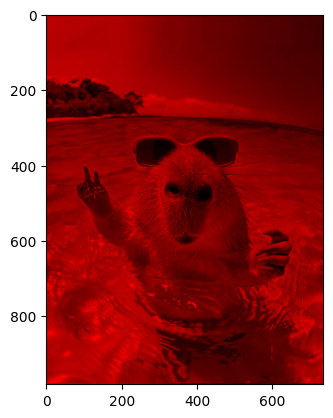

In [ ]:
from PIL import Image
import numpy as np

import imageio.v2 as iio
import matplotlib.pylab as plt


# BAI 1
# nạp ảnh
a = iio.imread('Capy.jpg')

# Tạo 3 ảnh đen mới cùng kích thước
r = np.zeros_like(a)
g = np.zeros_like(a)
b = np.zeros_like(a)

r[:,:,0] = a[:,:,0] # Kênh R đưa vào r
g[:,:,1] = a[:,:,1] # Kênh G đưa vào g
b[:,:,2] = a[:,:,2] # Kênh B đưa vào b

# Lưu mỗi kênh thành một ảnh riêng biệt.
iio.imwrite('Capy_red.png', r)
iio.imwrite('Capy_green.png', g)
iio.imwrite('Capy_blue.png', b)


# Hiển thị ảnh
plt.imshow(r)
plt.show()


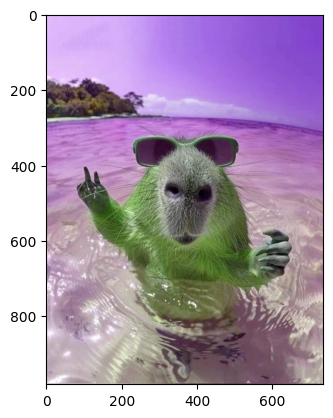

In [ ]:
#BAI 2

a = iio.imread('Capy.jpg')

# R <-> G
b1 = a.copy()
b1[:,:,0], b1[:,:,1] = a[:,:,1], a[:,:,0]
iio.imwrite('Capy_swap_rg.png', b1)

# R <-> B
b2 = a.copy()
b2[:,:,0], b2[:,:,2] = a[:,:,2], a[:,:,0]
iio.imwrite('Capy_swap_rb.png', b2)

# G <-> B
b3 = a.copy()
b3[:,:,1], b3[:,:,2] = a[:,:,2], a[:,:,1]
iio.imwrite('Capy_swap_gb.png', b3)

plt.imshow(b1)
# plt.imshow(b2)
# plt.imshow(b3)
plt.show()

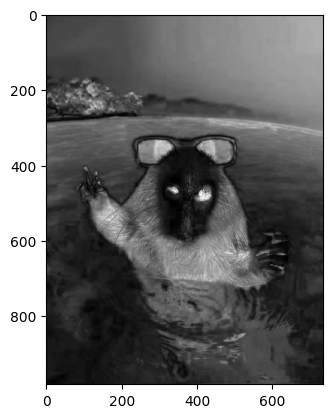

In [22]:
# BAI 3
import colorsys

a = iio.imread('Capy.jpg') 
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)

h, s, v = rgb2hsv(a[:,:,0], a[:,:,1], a[:,:,2])

iio.imwrite('Capy_hue.png', (h * 255).astype(np.uint8))
iio.imwrite('Capy_saturation.png', (s * 255).astype(np.uint8))
iio.imwrite('Capy_value.png', (v * 255).astype(np.uint8))

plt.imshow(s, cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..191.25].


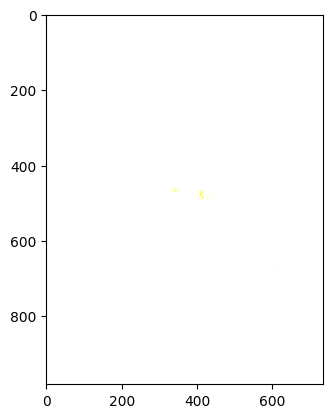

In [ ]:
# BAI 4
a = iio.imread('Capy.jpg') 
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)

h, s, v = rgb2hsv(a[:,:,0], a[:,:,1], a[:,:,2])

h_new = h / 3
v_new = v * 0.75

r, g, b = hsv2rgb(h_new, s, v_new)
img_new = np.stack([r, g, b], axis=2)

iio.imwrite('Capy_hsv_modified.png', (img_new * 255).astype(np.uint8))

plt.imshow(img_new)
plt.show()


Đang hiển thị ảnh: baby.jpeg


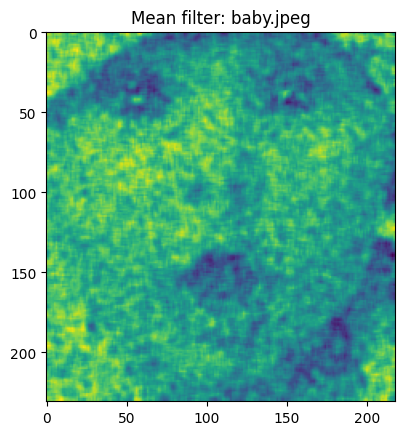

Đang hiển thị ảnh: balloons_noisy.png


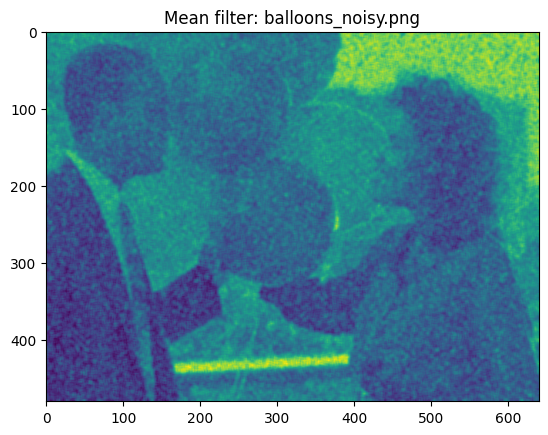

Đang hiển thị ảnh: flower.jpeg


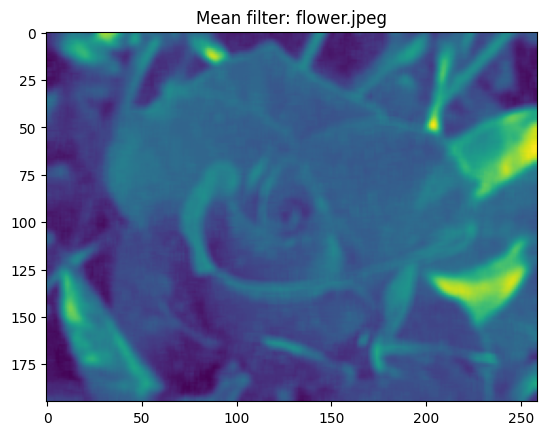

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import os

# BAI 5


# Đọc từng ảnh trong thư mục "Exercise"
for fname in os.listdir('exercise'):
    if fname.endswith('.png') or fname.endswith('.jpeg'):
        path = os.path.join('exercise', fname)
        
        # Đọc ảnh và chuyển sang ảnh xám
        a = iio.imread(path, mode='F')
        k = np.ones((5,5)) / 25
        # Lọc trung bình
        b = sn.convolve(a, k).astype(np.uint8)

        # Hiển thị kết quả
        print('Đang hiển thị ảnh:', fname)
        plt.imshow(b)
        plt.title('Mean filter: ' + fname)
        plt.show()